# Read Clade Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clade_df = pd.read_csv("../June_mutation_freq.csv")
clade_df.head()

,month,mutation,count,frequency
0,2020-04,M:A2V,8,0.015066
1,2020-04,N:D377G,15,0.028249
2,2020-04,N:E367K,1,0.001883
3,2020-04,N:G204R,57,0.107345
4,2020-04,N:M210I,2,0.003766


In [3]:
clade_df.shape

(2903, 4)

In [4]:
mutation_arr = set(list(clade_df['mutation']))
len(mutation_arr)

1711

In [5]:
clade_6month = pd.read_csv("../June_mutation_freq_6months.csv")
clade_6month.head()

,mutation,number_month
0,N:G204R,14
1,N:R203K,14
2,ORF1b:P314L,14
3,S:D614G,14
4,ORF3a:Q57H,13


In [6]:
clade_6month_list = list(clade_6month['mutation'])
len(clade_6month_list)

53

In [7]:
clade_info = {}

for index, row in clade_df.iterrows():
#     mutation_name = row['mutation'].split(":")[0]
    mutation_name = row['mutation']
    if(mutation_name not in clade_6month_list):    # filter out all the short lived mutations
        continue     
    
    month = row['month']
    if(mutation_name not in clade_info):
        clade_info[mutation_name] = {}
    if(month not in clade_info[mutation_name]):
        clade_info[mutation_name][month] = 0
    clade_info[mutation_name][month] += row["frequency"]

In [8]:
clade_info

{'N:G204R': {'2020-04': 0.107344632768362,
  '2020-05': 0.117117117117117,
  '2020-06': 0.126688102893891,
  '2020-07': 0.121761658031088,
  '2020-08': 0.120689655172414,
  '2020-09': 0.139130434782609,
  '2020-10': 0.0878186968838527,
  '2020-11': 0.0895196506550218,
  '2020-12': 0.0809090909090909,
  '2021-01': 0.0716332378223496,
  '2021-02': 0.0396158463385354,
  '2021-03': 0.0129950495049505,
  '2021-04': 0.0056689342403628,
  '2021-05': 0.0053763440860215},
 'N:R203K': {'2020-04': 0.107344632768362,
  '2020-05': 0.117117117117117,
  '2020-06': 0.126688102893891,
  '2020-07': 0.121761658031088,
  '2020-08': 0.120689655172414,
  '2020-09': 0.139130434782609,
  '2020-10': 0.0878186968838527,
  '2020-11': 0.0895196506550218,
  '2020-12': 0.0809090909090909,
  '2021-01': 0.0716332378223496,
  '2021-02': 0.0396158463385354,
  '2021-03': 0.0133044554455446,
  '2021-04': 0.0056689342403628,
  '2021-05': 0.0053763440860215},
 'ORF1a:I300F': {'2020-04': 0.0828625235404896,
  '2020-05': 0.1

In [9]:
month_arr = list(set(list(clade_df['month'])))
month_arr = sorted(month_arr)

In [10]:
mutation_freq_arr = {}

for mutation in clade_info:
    mutation_freq_arr[mutation] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in clade_info[mutation]):
            mutation_freq_arr[mutation][i] = clade_info[mutation][month]

In [11]:
print(month_arr)
mutation_freq_arr

['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05']


{'N:G204R': array([0.10734463, 0.11711712, 0.1266881 , 0.12176166, 0.12068966,
        0.13913043, 0.0878187 , 0.08951965, 0.08090909, 0.07163324,
        0.03961585, 0.01299505, 0.00566893, 0.00537634]),
 'N:R203K': array([0.10734463, 0.11711712, 0.1266881 , 0.12176166, 0.12068966,
        0.13913043, 0.0878187 , 0.08951965, 0.08090909, 0.07163324,
        0.03961585, 0.01330446, 0.00566893, 0.00537634]),
 'ORF1a:I300F': array([0.08286252, 0.11454311, 0.11382637, 0.11010363, 0.08275862,
        0.07391304, 0.08498584, 0.09388646, 0.07818182, 0.05921681,
        0.01440576, 0.00402228, 0.        , 0.        ]),
 'ORF1b:P314L': array([0.13559322, 0.14414414, 0.13954984, 0.13406736, 0.1       ,
        0.09130435, 0.11048159, 0.10043668, 0.08454545, 0.07449857,
        0.05162065, 0.04486386, 0.04450113, 0.03978495]),
 'ORF3a:K75N': array([0.00188324, 0.001287  , 0.00064309, 0.00064767, 0.        ,
        0.00434783, 0.        , 0.        , 0.00090909, 0.        ,
        0.        , 0.

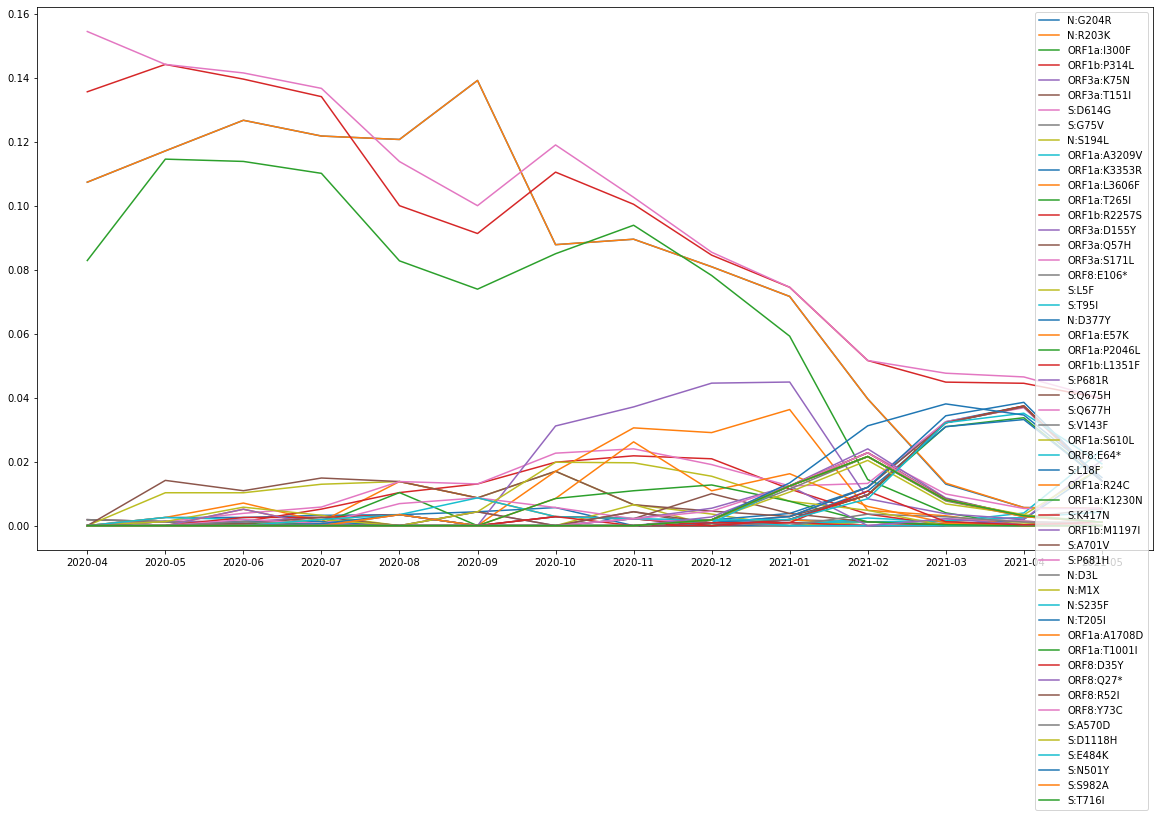

In [12]:
plt.rcParams["figure.figsize"] = (20,10)

# limit = 14
# plt.plot(month_arr[:limit], x, label="X")
# plt.plot(month_arr[:limit], y, label="Y")
# plt.legend(loc="upper right")

for mutation in mutation_freq_arr:
    plt.plot(month_arr, mutation_freq_arr[mutation], label=mutation)

plt.legend(loc="upper right")
plt.show()

# Read  Old Data

In [13]:
symptom_df = pd.read_csv("../symptom_frequency_monthWise - symptom_frequency_monthWise.csv")
symptom_df

,Symptom Name,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,High fever,646,440,976,257,165,177,55,61,33,18,5
1,Difficulty in breathing,4412,1745,5317,1055,490,405,195,234,175,103,14
2,Muscle pain,6139,3884,11889,2370,1292,1031,435,505,264,165,19
3,Dry cough,11219,5131,16114,3066,1807,1699,678,836,498,277,47
4,Not getting smell,1880,1943,7771,1763,1031,688,402,455,301,139,22
5,Feeling testless,3126,2829,8891,2029,1115,860,400,439,287,141,21
6,Fever,3563,3684,8302,2154,1260,1146,413,522,264,139,23
7,Sore throat,7051,3488,11351,2215,1058,889,412,427,273,148,19
8,Weakness,7950,910,2363,683,374,307,154,117,93,38,8
9,Itching eyes or turning red,5709,2295,9253,1372,632,433,225,272,155,89,18


In [14]:
symptom_freq_arr = {}

for index, row in symptom_df.iterrows():
    symptom_name = row['Symptom Name']
    symptom_freq_arr[symptom_name] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in row):
            symptom_freq_arr[symptom_name][i] = row[month]

In [15]:
symptom_freq_arr

{'High fever': array([646., 440., 976., 257., 165., 177.,  55.,  61.,  33.,  18.,   5.,
          0.,   0.,   0.]),
 'Difficulty in breathing': array([4412., 1745., 5317., 1055.,  490.,  405.,  195.,  234.,  175.,
         103.,   14.,    0.,    0.,    0.]),
 'Muscle pain': array([ 6139.,  3884., 11889.,  2370.,  1292.,  1031.,   435.,   505.,
          264.,   165.,    19.,     0.,     0.,     0.]),
 'Dry cough': array([11219.,  5131., 16114.,  3066.,  1807.,  1699.,   678.,   836.,
          498.,   277.,    47.,     0.,     0.,     0.]),
 'Not getting smell': array([1880., 1943., 7771., 1763., 1031.,  688.,  402.,  455.,  301.,
         139.,   22.,    0.,    0.,    0.]),
 'Feeling testless': array([3126., 2829., 8891., 2029., 1115.,  860.,  400.,  439.,  287.,
         141.,   21.,    0.,    0.,    0.]),
 'Fever': array([3563., 3684., 8302., 2154., 1260., 1146.,  413.,  522.,  264.,
         139.,   23.,    0.,    0.,    0.]),
 'Sore throat': array([ 7051.,  3488., 11351.,  2215., 

# Read new data (No data for march)

In [16]:
import json

with open("new_data.json", "r") as f:
    data = json.load(f)

In [17]:
data

{'Feeling pain and pressure in chest': {'2020-04': {'BD': 14533,
   'Dhaka': 3014},
  '2020-05': {'BD': 8918, 'Dhaka': 1534},
  '2020-06': {'BD': 26882, 'Dhaka': 3613},
  '2020-07': {'BD': 6692, 'Dhaka': 651},
  '2020-08': {'BD': 4468, 'Dhaka': 424},
  '2020-09': {'BD': 3280, 'Dhaka': 337},
  '2020-10': {'BD': 1481, 'Dhaka': 169},
  '2020-11': {'BD': 1575, 'Dhaka': 198},
  '2020-12': {'BD': 1117, 'Dhaka': 105},
  '2021-01': {'BD': 680, 'Dhaka': 63},
  '2021-02': {'BD': 129, 'Dhaka': 8},
  '2021-04': {'BD': 3494, 'Dhaka': 373},
  '2021-05': {'BD': 1186, 'Dhaka': 87},
  '2021-06': {'BD': 59, 'Dhaka': 8}},
 'Not getting smell': {'2020-04': {'BD': 4502, 'Dhaka': 873},
  '2020-05': {'BD': 5954, 'Dhaka': 1157},
  '2020-06': {'BD': 21205, 'Dhaka': 2768},
  '2020-07': {'BD': 6498, 'Dhaka': 641},
  '2020-08': {'BD': 5441, 'Dhaka': 458},
  '2020-09': {'BD': 3541, 'Dhaka': 333},
  '2020-10': {'BD': 1815, 'Dhaka': 245},
  '2020-11': {'BD': 2299, 'Dhaka': 273},
  '2020-12': {'BD': 1390, 'Dhaka': 16

In [18]:
# month_total_cases = {}
# for symptom in data:
#     for month in data[symptom]:
#         if(month not in month_total_cases):
#             month_total_cases[month] = 0
#         month_total_cases[month] += data[symptom][month]['BD']
# month_total_cases

with open("month_total.json", 'r') as f:
    month_total_cases = json.load(f)
month_total_cases

{'2020-03': 52133,
 '2020-04': 111653,
 '2020-05': 65371,
 '2020-06': 236990,
 '2020-07': 51092,
 '2020-08': 32353,
 '2020-09': 24388,
 '2020-10': 10884,
 '2020-11': 11734,
 '2020-12': 8264,
 '2021-01': 5616,
 '2021-02': 1105,
 '2021-04': 28987,
 '2021-05': 8681,
 '2021-06': 672}

In [19]:
symptom_freq_arr = {}

for symptom in data:
    arr = []
    for month in data[symptom]:
#         arr.append(data[symptom][month]['BD'])            # consider total counts
        arr.append(data[symptom][month]['BD']/month_total_cases[month]) # consider percentage
    
    symptom_freq_arr[symptom] = np.array(arr)
    
symptom_freq_arr

{'Feeling pain and pressure in chest': array([0.1301622 , 0.13642135, 0.11343095, 0.13097941, 0.13810157,
        0.13449237, 0.1360713 , 0.13422533, 0.13516457, 0.12108262,
        0.11674208, 0.12053679, 0.13662021, 0.08779762]),
 'Not getting smell': array([0.04032135, 0.09108014, 0.08947635, 0.12718234, 0.16817606,
        0.14519436, 0.16675854, 0.19592637, 0.16819942, 0.12873932,
        0.12488688, 0.07906993, 0.10690013, 0.0952381 ]),
 'Dry cough': array([0.21771918, 0.23775068, 0.1838221 , 0.2328936 , 0.29790128,
        0.35209939, 0.29584712, 0.34361684, 0.30844627, 0.28027066,
        0.22714932, 0.19308656, 0.22866029, 0.21130952]),
 'Diabetes': array([0.06139557, 0.07894938, 0.06830668, 0.07829014, 0.07915804,
        0.06400689, 0.07175671, 0.07277996, 0.08313166, 0.07834758,
        0.09049774, 0.05919895, 0.07107476, 0.07142857]),
 'Kidney problem': array([0.01883514, 0.01858622, 0.01607663, 0.0181046 , 0.01869997,
        0.01709857, 0.01984564, 0.01874893, 0.02166021

# Misc

In [20]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [21]:
def applyMinMaxNorm(arr):
    arr = np.array(arr)
    ret = np.zeros(len(arr))
    
    mx = arr.max()
    mn = arr.min()

    for i in range(len(arr)):
        ret[i] = (arr[i] - mn)/(mx - mn)
    
    return ret

In [22]:
# symptom = 'High fever'
# mutation1 = 'ORF1b'
# mutation2 = 'ORF3a'

# limit = 14

# x1 = applyMinMaxNorm(mutation_freq_arr[mutation1][:limit])
# x2 = applyMinMaxNorm(mutation_freq_arr[mutation2][:limit])
# y = applyMinMaxNorm(symptom_freq_arr[symptom][:limit])

In [23]:
# y

In [24]:
# plt.rcParams["figure.figsize"] = (20,10)
# plt.plot(month_arr[:limit], x1, label="X1", color="blue")
# plt.plot(month_arr[:limit], x2, label="X2", color="blue")
# plt.plot(month_arr[:limit], y, label="Y", color="red")
# plt.legend(loc="upper right")

# Multiple Regression

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [26]:
def getFeatureVector(feature_arr):
    ln = len(feature_arr[0])
    ret = []
    for i in range(ln):
        ret.append([])
        
    for arr in feature_arr:
        for i in range(len(arr)):
            ret[i].append(arr[i])
    return np.array(ret)

In [27]:
# print(getFeatureVector([x1,x2]).shape)
# getFeatureVector([x1,x2])

In [28]:
# regr = linear_model.LinearRegression()
# X = getFeatureVector([x1,x2])
# print(X.shape)
# regr.fit(X, y)

In [29]:
# print(regr.coef_)
# print(regr.intercept_)
# print(regr.score(X,y))

In [30]:
# print(regr.coef_[0])

In [31]:
# y_pred = regr.predict(X)
# mean_squared_error(y_pred, y)

In [32]:
def getXY(symptom_arr, mutation, limit = -1):
    y = applyMinMaxNorm(mutation_freq_arr[mutation])
    xrr = []
    for symptom in symptom_arr:
        x = applyMinMaxNorm(symptom_freq_arr[symptom])
        xrr.append(x)
        
    if(limit != -1):
        y = y[:limit]
        for i in range(len(xrr)):
            xrr[i] = xrr[i][:limit]
    return xrr, y

In [33]:
def plotFormattedData(symptom_arr, mutation, limit = -1):
    print(symptom_arr, mutation)
    xrr, y = getXY(symptom_arr, mutation, limit)
    month_arr = list(set(list(clade_df['month'])))
    month_arr = sorted(month_arr)
    if(limit!=-1):
        month_arr = month_arr[:limit]
    
    for i in range(len(symptom_arr)):
        symptom = symptom_arr[i]
        x = xrr[i]
        plt.plot(month_arr, x, label=symptom)
    
    plt.plot(month_arr, y, label=mutation, linewidth=5)
    plt.legend(loc="upper right")
    plt.show()

In [34]:
def performMultipleRegression(symptom_arr, mutation, limit = -1):
#     print(symptom_arr)
    xrr, y = getXY(symptom_arr, mutation, limit)
            
    X = getFeatureVector(xrr)
#     print(X.shape, y.shape)
    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    
    coef = regr.coef_
    r_squared = regr.score(X, y)
    y_pred = regr.predict(X)
    mse = mean_squared_error(y_pred, y)
    
    weights = {}
    for i in range(len(symptom_arr)):
        weights[symptom_arr[i]] = coef[i]
        
    return {
        "weights"  : weights,
        "r_squared": r_squared,
        "mse"      : mse,
        "symptoms" : symptom_arr
    }

In [35]:
performMultipleRegression(["Heart diseases", "Sore throat"], 'ORF1b:P314L')

{'weights': {'Heart diseases': -0.11118220572199733,
  'Sore throat': 0.5876167181700039},
 'r_squared': 0.22016167058264002,
 'mse': 0.09370066811678786,
 'symptoms': ['Heart diseases', 'Sore throat']}

In [36]:
##########################################################################################

In [37]:
for symp in symptom_freq_arr:
    print(symp)

Feeling pain and pressure in chest
Not getting smell
Dry cough
Diabetes
Kidney problem
Fever
Sore throat
Difficulty in breathing
High blood pressure
High fever
Weakness
Itching eyes or turning red
Sleepiness
Respiratory illness
Feeling testless
Muscle pain
Abdominal pain, nausea or thin closet
Cancer
Heart diseases


In [43]:
mutation = "ORF1a:K1230N"
limit = -1

In [44]:
##########################################################################################

# Filter Positive Slopes

In [48]:
symptom_arr = []
has_positive_slopes = []
for symptom in symptom_freq_arr:
    symptom_arr.append(symptom)
    reg_vals = performMultipleRegression([symptom], mutation, limit)
    weight = -1
    r_sq = reg_vals["r_squared"]
    for key in reg_vals['weights']:
        weight = reg_vals['weights'][key]
    if(weight > 0 and r_sq > .4):
        has_positive_slopes.append(symptom)
        print(mutation, " >> ", symptom, weight, r_sq)

ORF1a:K1230N  >>  Not getting smell 0.9044435425496864 0.4467891368077044
ORF1a:K1230N  >>  Difficulty in breathing 0.8538566920942519 0.5676446613028823
ORF1a:K1230N  >>  Respiratory illness 0.8512820632721769 0.46406891316994925
ORF1a:K1230N  >>  Heart diseases 0.9971480667620227 0.4355344126123045


In [49]:
len(has_positive_slopes)

4

['Not getting smell', 'Difficulty in breathing', 'Respiratory illness', 'Heart diseases'] ORF1a:K1230N


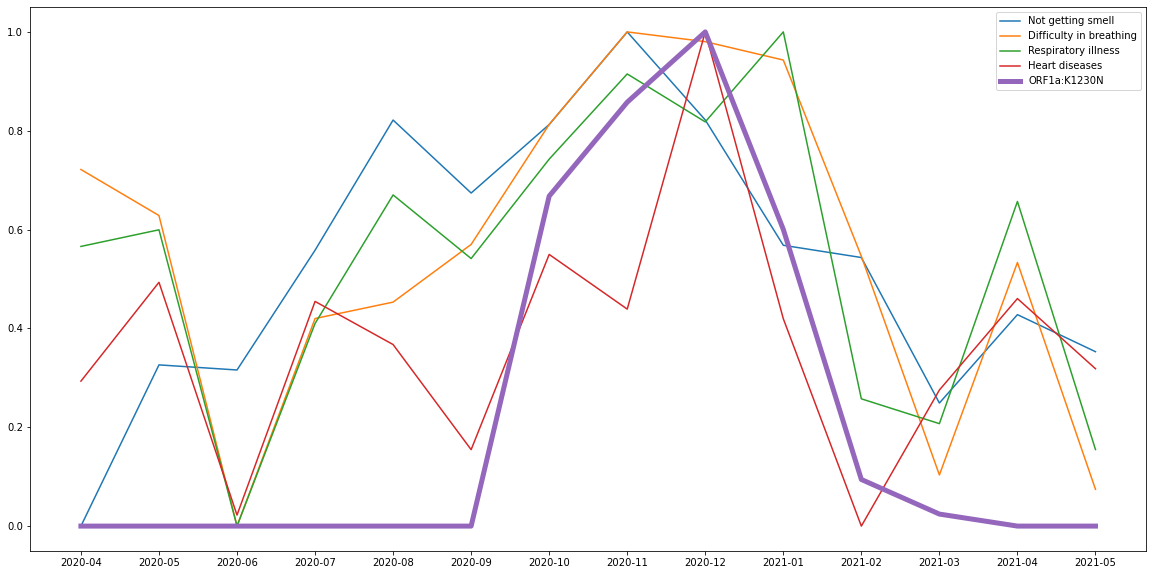

In [50]:
plotFormattedData(has_positive_slopes, mutation, limit)

['Itching eyes or turning red'] ORF1b:P314L


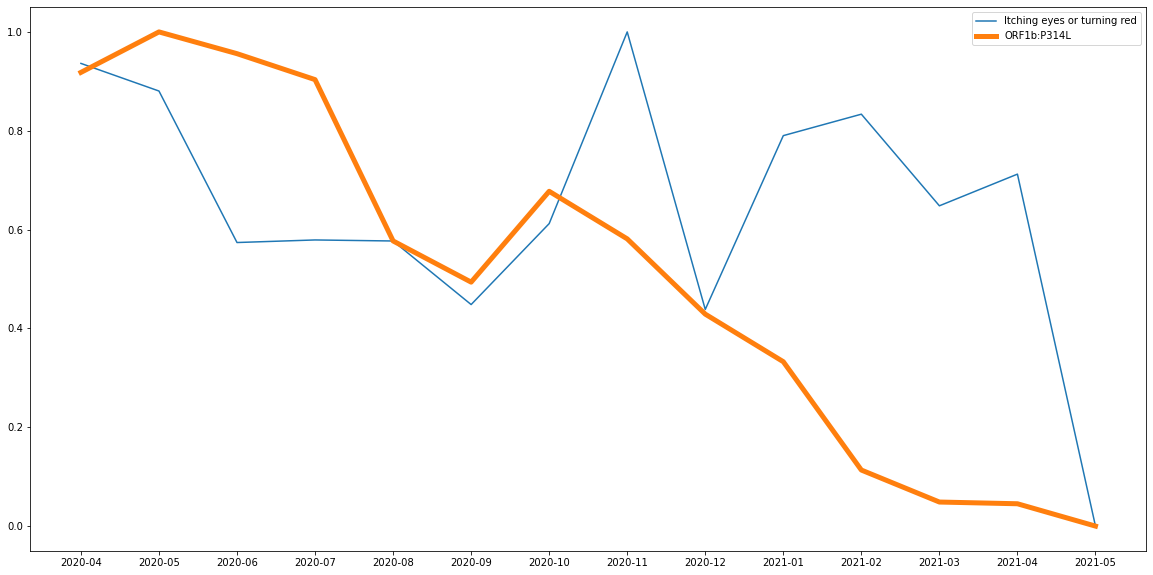

In [122]:
plotFormattedData(['Itching eyes or turning red'], mutation)

# Check all combinations

In [123]:
import itertools
from operator import itemgetter

In [124]:
all_combinations = []
combination_limit = 3
for i in range(1, min(combination_limit, len(has_positive_slopes))+1):
    current_combinations = itertools.combinations(has_positive_slopes, i)
    for comb in current_combinations:
        print(list(comb))
        all_combinations.append(list(comb))
all_combinations

['Feeling pain and pressure in chest']
['Dry cough']
['Fever']
['Sore throat']
['Difficulty in breathing']
['High blood pressure']
['Weakness']
['Itching eyes or turning red']
['Respiratory illness']
['Feeling testless']
['Muscle pain']
['Heart diseases']
['Feeling pain and pressure in chest', 'Dry cough']
['Feeling pain and pressure in chest', 'Fever']
['Feeling pain and pressure in chest', 'Sore throat']
['Feeling pain and pressure in chest', 'Difficulty in breathing']
['Feeling pain and pressure in chest', 'High blood pressure']
['Feeling pain and pressure in chest', 'Weakness']
['Feeling pain and pressure in chest', 'Itching eyes or turning red']
['Feeling pain and pressure in chest', 'Respiratory illness']
['Feeling pain and pressure in chest', 'Feeling testless']
['Feeling pain and pressure in chest', 'Muscle pain']
['Feeling pain and pressure in chest', 'Heart diseases']
['Dry cough', 'Fever']
['Dry cough', 'Sore throat']
['Dry cough', 'Difficulty in breathing']
['Dry cough', 'H

[['Feeling pain and pressure in chest'],
 ['Dry cough'],
 ['Fever'],
 ['Sore throat'],
 ['Difficulty in breathing'],
 ['High blood pressure'],
 ['Weakness'],
 ['Itching eyes or turning red'],
 ['Respiratory illness'],
 ['Feeling testless'],
 ['Muscle pain'],
 ['Heart diseases'],
 ['Feeling pain and pressure in chest', 'Dry cough'],
 ['Feeling pain and pressure in chest', 'Fever'],
 ['Feeling pain and pressure in chest', 'Sore throat'],
 ['Feeling pain and pressure in chest', 'Difficulty in breathing'],
 ['Feeling pain and pressure in chest', 'High blood pressure'],
 ['Feeling pain and pressure in chest', 'Weakness'],
 ['Feeling pain and pressure in chest', 'Itching eyes or turning red'],
 ['Feeling pain and pressure in chest', 'Respiratory illness'],
 ['Feeling pain and pressure in chest', 'Feeling testless'],
 ['Feeling pain and pressure in chest', 'Muscle pain'],
 ['Feeling pain and pressure in chest', 'Heart diseases'],
 ['Dry cough', 'Fever'],
 ['Dry cough', 'Sore throat'],
 ['Dry 

In [125]:
from tqdm import tqdm
track = []

for i in tqdm(range(len(all_combinations))):
    comb = all_combinations[i]
    reg_val = performMultipleRegression(comb, mutation, limit)
#     print(reg_val)
    track.append(reg_val)

100%|██████████| 298/298 [00:00<00:00, 1124.18it/s]


In [126]:
mutation

'ORF1b:P314L'

In [127]:
sorted(track, key=itemgetter('r_squared'), reverse=True)

[{'weights': {'Fever': -1.6264114247307229,
   'Sore throat': 2.340215392092349,
   'Respiratory illness': -0.5248731869549984},
  'r_squared': 0.6865102967397347,
  'mse': 0.037667031146272005,
  'symptoms': ['Fever', 'Sore throat', 'Respiratory illness']},
 {'weights': {'Fever': -1.7320255510153646,
   'Sore throat': 2.381376575812815,
   'Difficulty in breathing': -0.4285282989533876},
  'r_squared': 0.6689983980481703,
  'mse': 0.03977115522621949,
  'symptoms': ['Fever', 'Sore throat', 'Difficulty in breathing']},
 {'weights': {'Fever': -2.0792932840333553,
   'Sore throat': 2.517153831301235,
   'Weakness': -0.5701614990681042},
  'r_squared': 0.6652396080427648,
  'mse': 0.04022278875272278,
  'symptoms': ['Fever', 'Sore throat', 'Weakness']},
 {'weights': {'Dry cough': -0.5009675698432864,
   'Fever': -1.1359432367543392,
   'Sore throat': 2.010085907670043},
  'r_squared': 0.6209944442830357,
  'mse': 0.04553902065468733,
  'symptoms': ['Dry cough', 'Fever', 'Sore throat']},
 

In [128]:
sorted(track, key=itemgetter('mse'), reverse=False)

[{'weights': {'Fever': -1.6264114247307229,
   'Sore throat': 2.340215392092349,
   'Respiratory illness': -0.5248731869549984},
  'r_squared': 0.6865102967397347,
  'mse': 0.037667031146272005,
  'symptoms': ['Fever', 'Sore throat', 'Respiratory illness']},
 {'weights': {'Fever': -1.7320255510153646,
   'Sore throat': 2.381376575812815,
   'Difficulty in breathing': -0.4285282989533876},
  'r_squared': 0.6689983980481703,
  'mse': 0.03977115522621949,
  'symptoms': ['Fever', 'Sore throat', 'Difficulty in breathing']},
 {'weights': {'Fever': -2.0792932840333553,
   'Sore throat': 2.517153831301235,
   'Weakness': -0.5701614990681042},
  'r_squared': 0.6652396080427648,
  'mse': 0.04022278875272278,
  'symptoms': ['Fever', 'Sore throat', 'Weakness']},
 {'weights': {'Dry cough': -0.5009675698432864,
   'Fever': -1.1359432367543392,
   'Sore throat': 2.010085907670043},
  'r_squared': 0.6209944442830357,
  'mse': 0.04553902065468733,
  'symptoms': ['Dry cough', 'Fever', 'Sore throat']},
 

['Sore throat', 'Fever'] ORF1b:P314L


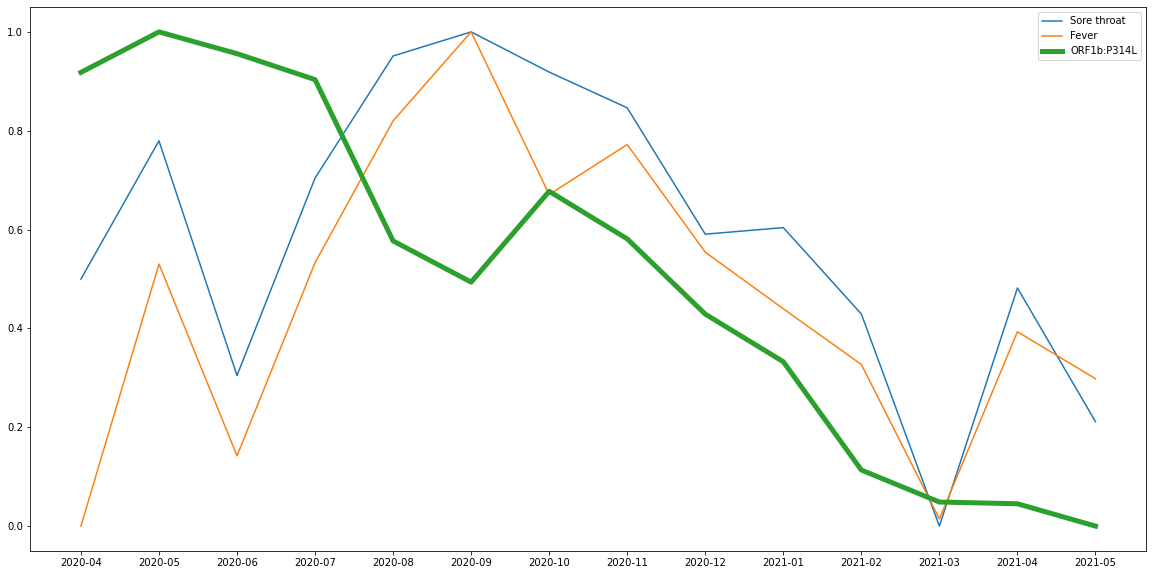

In [130]:
plotFormattedData(['Sore throat', 'Fever'], mutation)

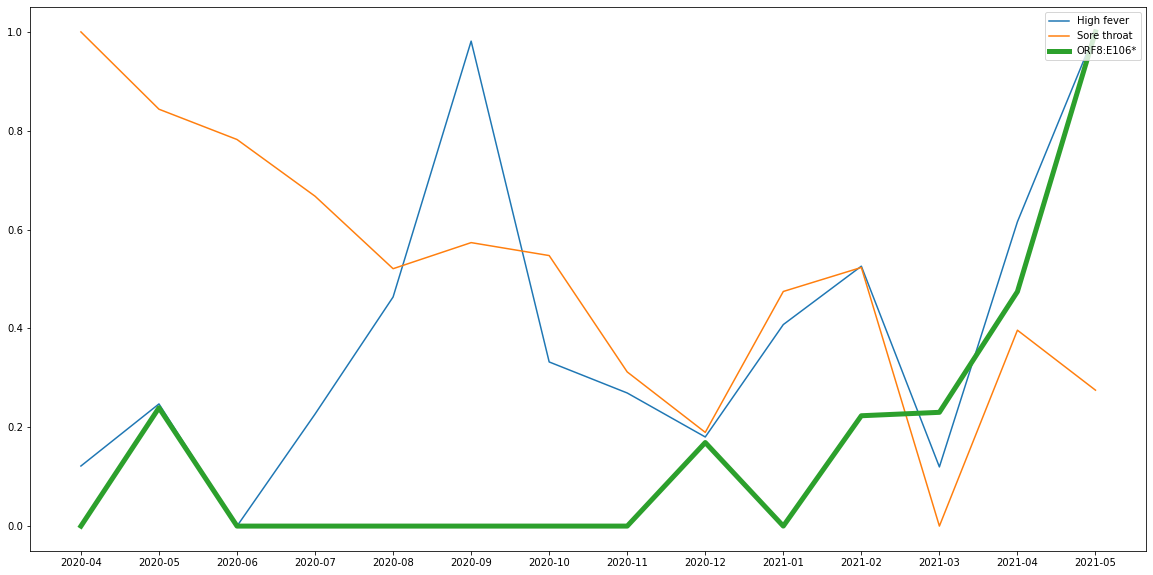

In [40]:
plotFormattedData(["High fever", "Sore throat"], 'ORF8:E106*')

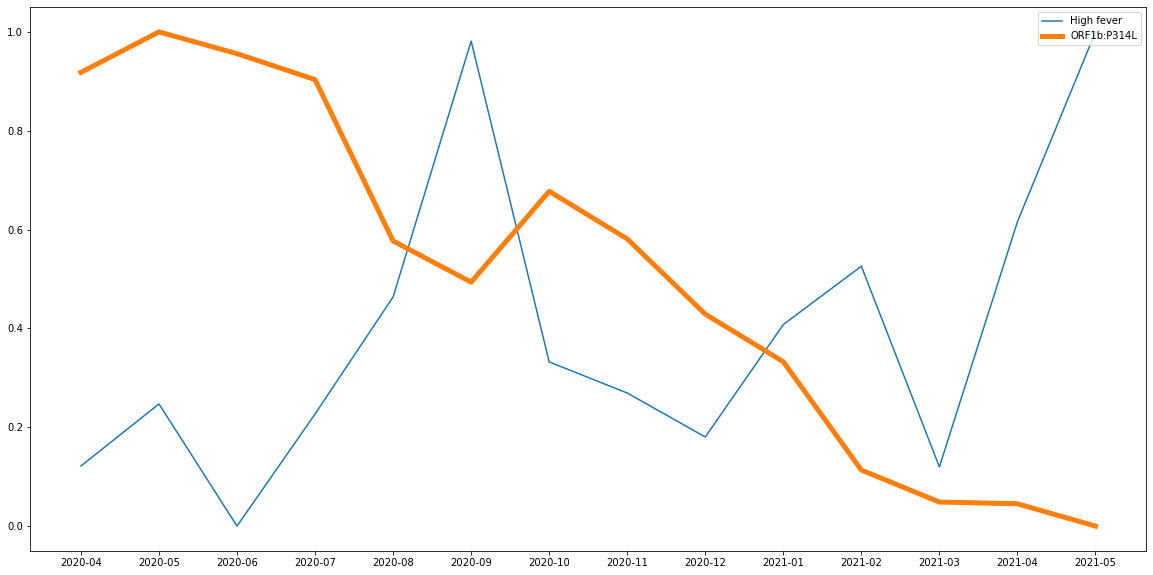

In [52]:
plotFormattedData(["High fever"], 'ORF1b:P314L')